{% include toc title="On This Page" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

* Open, plot, and explore raster data using **Python**.
* Handle no data values in raster data. 
* Create plotting extents so you can plot raster and vector data together using matplotlib.
* Explore raster data using histograms and descriptive statistics.

</div>

## Open Raster Data in Open Source Python

Remember from the previous lesson that raster or “gridded” data are stored as a 
grid of values which are rendered on a map as pixels. Each pixel value 
represents an area on the Earth’s surface. A raster file is composed of 
regular grid of cells, all of which are the same size. Raster data can 
be used to store many different types of scientific data including 

* elevation data
* canopy height models
* surface temperature 
* climate model data outputs
* landuse / landcover data
* and more.

<figure>
   <a href="{{ site.url }}/images/earth-analytics/raster-data/raster-concept.png" target="_blank">
   <img src="{{ site.url }}/images/earth-analytics/raster-data/raster-concept.png" alt="Raster data concept diagram."></a>
   <figcaption>A raster is composed of a regular grid of cells. Each cell is the same
   size in the x and y direction. Source: Colin Williams, NEON.
   </figcaption>
</figure>

In this lesson you will learn more about working with lidar derived raster data
that represents both terrain / elevation data (elevation of the earth's surface),
and surface elevation (elevation at the tops of trees, buildings etc above the earth's
surface). If you want to read more about how lidar data are used to derive 
raster based surface models, you can check out <a href="https://www.earthdatascience.org/courses/use-data-open-source-python/data-stories/what-is-lidar-data/" target="_blank"> this chapter on lidar remote sensing data and the various raster data products derived from lidar data.</a> 

<figure>
   <a href="https://www.earthdatascience.org/images/earth-analytics/lidar-raster-data/lidarTree-height.png">
   <img src="https://www.earthdatascience.org/images/earth-analytics/lidar-raster-data/lidarTree-height.png" alt="Lidar derived DSM, DTM and CHM."></a>
   <figcaption>Digital Surface Model (DSM), Digital Elevation Models (DEM) and
   the Canopy Height Model (CHM) are the most common raster format lidar
   derived data products. One way to derive a CHM is to take
   the difference between the digital surface model (DSM, tops of trees, buildings
   and other objects) and the Digital Terrain Model (DTM, ground level). The CHM
   represents the actual height of trees, buildings, etc. with the influence of
   ground elevation removed. Graphic: Colin Williams, NEON
   </figcaption>
</figure>

<i class="fa fa-star"></i> **Data Tip:** 
The data used in this lesson are NEON (National Ecological Observatory Network) data. 
{: .notice--success }

To begin load the 
packages that you need to process your raster data.

In [1]:
# Import necessary packages
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Use geopandas for vector data and xarray for raster data
import geopandas as gpd
import rioxarray as rxr

import earthpy as et

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

In [2]:
# Get data and set working directory
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))

Below, you define the path to a lidar derived digital elevation model (DEM)
that was created using NEON (the National Ecological Observatory Network) data. 

<div class='notice--success alert alert-info' markdown="1">

<i class="fa fa-star"></i> **Data Tip:** DEM's are also sometimes referred to 
as DTM (Digital Terrain Model or 
DTM). You can learn more about the 3 lidar derived elevation data types: <a href="https://www.earthdatascience.org/courses/use-data-open-source-python/data-stories/what-is-lidar-data/lidar-chm-dem-dsm/" >DEMs,
Canopy Height Models (CHM) and Digital Surface Models (DSMs) in the lidar chapter
of this textbook.</a>
</div>

You then open the data using rioxarray - `rxr.open_rasterio("path-to-raster-here")`.

In [3]:
# Define relative path to file
dem_pre_path = os.path.join("colorado-flood",
                            "spatial",
                            "boulder-leehill-rd",
                            "pre-flood",
                            "lidar",
                            "pre_DTM.tif")

dtm_pre_arr = rxr.open_rasterio(dem_pre_path)
dtm_pre_arr

<xarray.DataArray (band: 1, y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int64 0
Attributes:
    _FillValue:    -3.4028234663852886e+38
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

When you open raster data using **xarray** or **rioxarray** you are creating an
`xarray.DataArray`. The. `DataArray` object stores the:

* raster data in a numpy array format
* spatial metadata including the CRS, spatial extent of the object
* and any metadata

`Xarray` and `numpy` provide an efficient way to work with and process 
raster  data. `xarray` also supports dask and parallel processing which 
allows you to more efficiently process larger datasets using the processing power
that you have on your computer

When you add `rioxarray` to your package imports, you further get access 
to spatial data processing using `xarray` objects. Below, you can view
the spatial extent (`bounds()`) and `CRS` of the data that you just opened
above.

In [4]:
# View the Coordinate Reference System (CRS) & spatial extent
print("The CRS for this data is:", dtm_pre_arr.rio.crs)
print("The spatial extent is:", dtm_pre_arr.rio.bounds())

The CRS for this data is: EPSG:32613
The spatial extent is: (472000.0, 4434000.0, 476000.0, 4436000.0)


The `nodata` value (or fill value) is also stored in the 
`xarray` object.

In [5]:
# View no data value
print("The no data value is:", dtm_pre_arr.rio.nodata)

The no data value is: -3.4028235e+38


Once you have imported your data, you can plot is
using `xarray.plot()`. 

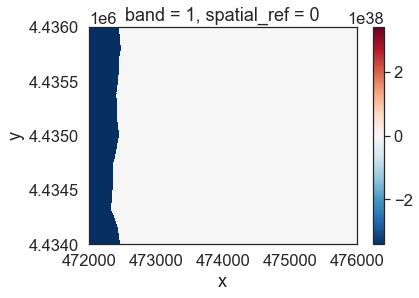

In [6]:
dtm_pre_arr.plot()
plt.show()

The data above should represent terrain model data. However, the range of 
values is not what is expected. These data are for Boulder, Colorado where 
the elevation may range from 1000-3000m. There may be some outlier values 
in the data that may need to be addressed. Below you look at the distribution
of pixel values in the data by plotting a histogram.

Notice that there seem to be a lot of pixel values in the negative range
in that plot.

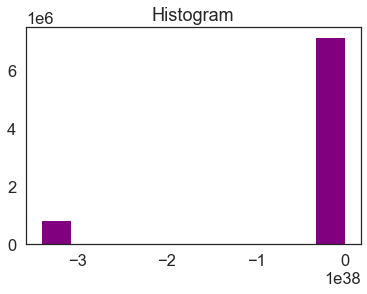

In [7]:
# A histogram can also be helpful to look at the range of values in your data
# What do you notice about the histogram below?
dtm_pre_arr.plot.hist(color="purple")
plt.show()

Looking at the min and max values of the data, you can see a 
very small negative number for the minimum. This number matches 
the nodata value that you looked at above. 

In [8]:
print("the minimum raster value is: ", np.nanmin(dtm_pre_arr.values))
print("the maximum raster value is: ", np.nanmax(dtm_pre_arr.values))

the minimum raster value is:  -3.4028235e+38
the maximum raster value is:  2087.43


Clean up the plot a bit by adding a title and removing the 
axis ticks!

In [9]:
# f, ax= plt.subplots(figsize=(10,5))
# dtm_pre_arr.plot(cmap="Greys_r")

# # Add a title and remove the ticks
# ax.set(title="Digital Terrain Model for Lee Hill Road - Boulder, CO\n NEON AOP Data")
# ax.set_axis_off()
# plt.show()

## Raster Data Exploration - Min and Max Values

Looking at the minimum value of the data, there is one of two things going on
that need to be fixed:

1. there may be no data values in the data with a negative value that are skewing your plot colors
2. there also could be outlier data in your raster

You can explore the first option - that there are no data values by reading 
in the data and masking no data values using the `masked=True` parameter like this:

`rxr.open_rasterio(dem_pre_path, masked=True)`

Above you may have also noticed that the array has an additional dimension for the 
"band". While the raster only has one layer - there is a 1 in the output of 
`shape` that could get in the way of processing.

You can remove that additional dimension using `.squeeze()`

In [10]:
# Notice that the shape of this object has a 1 at the beginning
# This can cause issues with plotting
dtm_pre_arr.shape

(1, 2000, 4000)

In [11]:
# Open the data and mask no data values
# Squeeze reduces the third dimension given there is only one "band" or layer to this data
dtm_pre_arr = rxr.open_rasterio(dem_pre_path, masked=True).squeeze()
# Notice there are now only 2 dimensions to your array
dtm_pre_arr.shape

(2000, 4000)

Plot the data again to see what has changed. Now you have a 
reasonable range of data values and the data plot as you 
might expect it to.

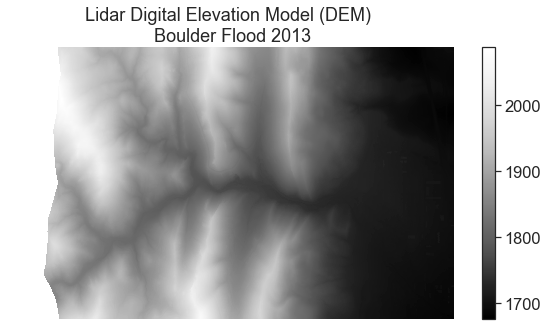

In [12]:
# Plot the data and notice that the scale bar looks better
# No data values are now masked
f, ax = plt.subplots(figsize=(10, 5))
dtm_pre_arr.plot(cmap="Greys_r",
                 ax=ax)
ax.set_title("Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013")
ax.set_axis_off()
plt.show()

The histogram has also changed. Now, it shows a reasonable
distribution of pixel values.


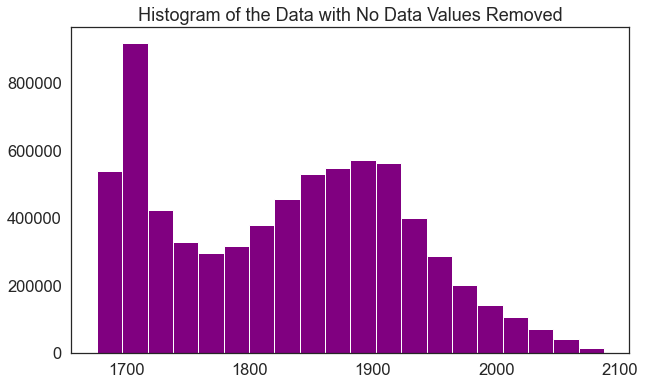

In [13]:
f, ax = plt.subplots(figsize=(10, 6))
dtm_pre_arr.plot.hist(color="purple",
                      bins=20)
ax.set_title("Histogram of the Data with No Data Values Removed")
plt.show()

Notice that now the minimum value looks more like
an elevation value (which should most often not be negative). 

In [14]:
print("The minimum raster value is: ", np.nanmin(dtm_pre_arr.data))
print("The maximum raster value is: ", np.nanmax(dtm_pre_arr.data))

The minimum raster value is:  1676.2099609375
The maximum raster value is:  2087.429931640625


## Plot Raster and Vector Data Together

If you want, you can also add shapefile overlays to your raster data plot. Below 
you open a single shapefile using Geopandas that contains a boundary layer that you can 
overlay on top of your raster dataset. You will learn more about 
<a href="https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/vector-data-processing/">working with shapefiles in Geopandas in this chapter of the earthdatascience.org intermediate textbook.</a>


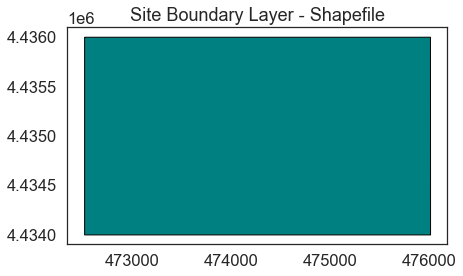

In [15]:
# Open site boundary vector layer
site_bound_path = os.path.join("colorado-flood",
                               "spatial",
                               "boulder-leehill-rd",
                               "clip-extent.shp")
site_bound_shp = gpd.read_file(site_bound_path)

# Plot the vector data
f, ax = plt.subplots(figsize=(8,4))
site_bound_shp.plot(color='teal',
                    edgecolor='black',
                    ax=ax)
ax.set(title="Site Boundary Layer - Shapefile")
plt.show()

Once you have your shapefile open, can plot the two datasets together
and begin to create a map. 

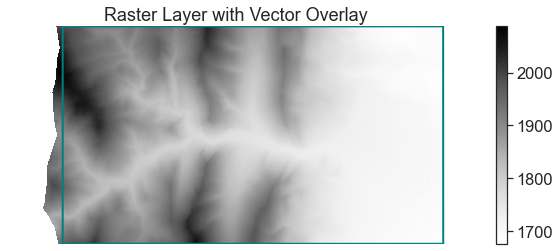

In [16]:
f, ax = plt.subplots(figsize=(11, 4))

dtm_pre_arr.plot.imshow(cmap="Greys",
                        ax=ax)
site_bound_shp.plot(color='None',
                    edgecolor='teal',
                    linewidth=2,
                    ax=ax,
                    zorder=4)

ax.set(title="Raster Layer with Vector Overlay")
ax.axis('off')
plt.show()

<div class='notice--success alert alert-info' markdown="1">

<i class="fa fa-star"></i> **Data Tip:** Customizing Raster Plot Color Ramps
To change the color of a raster plot you set the colormap. Matplotlib has a list of  <a href="https://matplotlib.org/users/colormaps.html" target="_blank">pre-determined color ramps that you can chose from.</a> You can reverse a color ramp by adding `_r` at the end of the color ramp's name, for example `cmap = 'viridis'` vs `cmap = 'viridis_r'`. 

</div>

You now have the basic skills needed to open and plot raster data using
`rioxarray` and `xarray`. In the following lessons, you will learn more 
about exploring and processing raster data. 